In [75]:
print ("Manuel Daza - 202016908_59")

Manuel Daza - 202016908_59


In [1]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Librerias para modelos de ciencia de Datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
#Leemos los datos para cargarlos en la variable

data = pd.read_csv('./wine_quality.csv')

In [4]:
#1. Analisis Exploratorio de los Datos:

data.head(30)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [18]:
data.shape

(1160, 12)

In [5]:
#Descripcion de los datos

data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [19]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
#2. Preprocesar los datos limpiándolos:

data.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599
mean,8.31964,0.527821,0.270976,2.53881,0.0874665,15.8749,46.4678,0.996747,3.31111,0.658149,10.423,5.63602
std,1.7411,0.17906,0.194801,1.40993,0.0470653,10.4602,32.8953,0.00188733,0.154386,0.169507,1.06567,0.807569
min,4.6,0.12,0,0.9,0.012,1,6,0.99007,2.74,0.33,8.4,3
25%,7.1,0.39,0.09,1.9,0.07,7,22,0.9956,3.21,0.55,9.5,5
50%,7.9,0.52,0.26,2.2,0.079,14,38,0.99675,3.31,0.62,10.2,6
75%,9.2,0.64,0.42,2.6,0.09,21,62,0.997835,3.4,0.73,11.1,6
max,15.9,1.58,1,15.5,0.611,72,289,1.00369,4.01,2,14.9,8


Text(0.5, 1.0, 'Identificación Datos Faltantes y Atípicos')

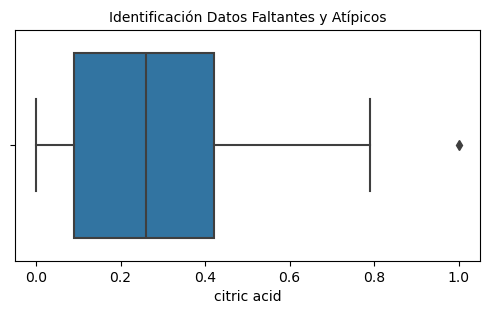

In [8]:
# Grafico para identificar valores atipicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=data['citric acid'])
plt.title('Identificación Datos Faltantes y Atípicos', fontsize=10)

(array([  3.,   0.,  22.,   0., 488.,   0., 464.,   0., 168.,  15.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

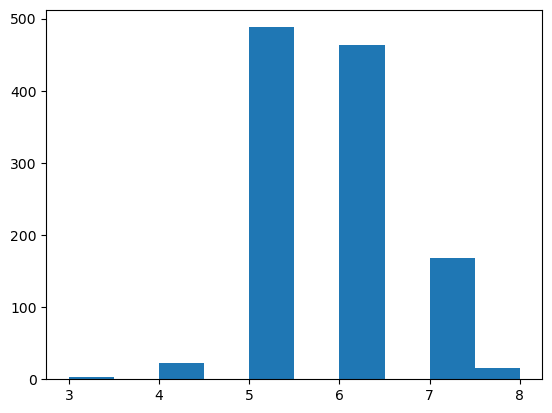

In [20]:
plt.hist(data.quality)

In [11]:
#Revisamos Datos Faltantes

print ("Registros de nivel de Acidez Faltantes: ",data['citric acid'].isnull().sum().sum())
print ("Registros de nidel de Calidad Faltantes: ",data['quality'].isnull().sum().sum())


Registros de nivel de Acidez Faltantes:  0
Registros de nidel de Calidad Faltantes:  0


#Se mide la cantidad de ácido acético del vino. La medida normal es de 0,3 a 0,6 gramos por litro.

#Cuanto menor acidez volátil tenga un vino mayor será la calidad. 

In [15]:
#Conteo Datos atipicos

ca_min=0.1
ca_max=0.9
total_atipicos=((data['citric acid']<ca_min)|(data['citric acid']>ca_max)).sum()
print("El total de datos atipicos es: {}".format(total_atipicos))

El total de datos atipicos es: 404


In [16]:
#Filtrar datos atipicos centrando el nivel de Acidez.

data=data[(data['citric acid']<ca_max)&(data['citric acid']>ca_min)]

In [17]:
#Reconteo Datos atipicos

ca_min=0.1
ca_max=0.9
total_atipicos=((data['citric acid']<ca_min)|(data['citric acid']>ca_max)).sum()
print("El total de datos atipicos es: {}".format(total_atipicos))

El total de datos atipicos es: 0


<Axes: xlabel='citric acid', ylabel='total sulfur dioxide'>

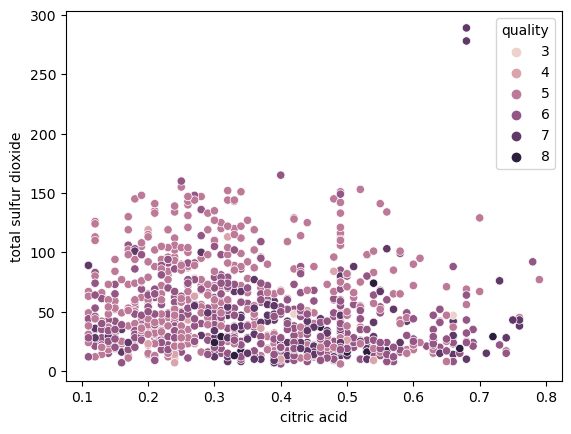

In [22]:
sns.scatterplot(x = "citric acid", y = "total sulfur dioxide", hue = "quality", data=data)

In [25]:
#Realizamos la prediccion de los datos tomando todas las columnas.

predictor_col = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]
target_col = ['quality']

In [26]:
predictor = data[predictor_col]
target = data[target_col]

In [28]:
predictor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5
13,7.8,0.610,0.29,1.6,0.114,9.0,29.0,0.99740,3.26,1.56,9.1
14,8.9,0.620,0.18,3.8,0.176,52.0,145.0,0.99860,3.16,0.88,9.2
...,...,...,...,...,...,...,...,...,...,...,...
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [29]:
target

,quality
3,6
9,5
11,5
13,5
14,5
...,...
1590,6
1592,6
1596,6
1597,5


In [31]:
#3. Seleccionar las características más relevantes para entrenar:
#El objetivo es predecir el precio del automóvil en función de sus atributos

data['selling_price'].value_counts()


selling_price
300000     227
600000     213
350000     209
550000     204
450000     195
          ... 
308000       1
3900000      1
2850000      1
39000        1
746000       1
Name: count, Length: 677, dtype: int64

In [31]:
correlacion = predictor.corr()
correlacion

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.111963,0.609032,0.080519,0.035887,-0.197676,-0.228090,0.655780,-0.629453,0.134699,0.012289
volatile acidity,-0.111963,1.000000,-0.402117,0.045275,0.121321,0.044773,0.254088,0.166310,0.019465,-0.187245,-0.298041
citric acid,0.609032,-0.402117,1.000000,0.108806,0.167786,-0.132793,-0.151254,0.305998,-0.394225,0.243477,0.227090
residual sugar,0.080519,0.045275,0.108806,1.000000,0.025898,0.201950,0.208750,0.346068,-0.054411,-0.008471,0.051264
chlorides,0.035887,0.121321,0.167786,0.025898,1.000000,-0.004131,0.028278,0.156983,-0.235359,0.369273,-0.218998
free sulfur dioxide,-0.197676,0.044773,-0.132793,0.201950,-0.004131,1.000000,0.683393,-0.020923,0.116098,0.021345,-0.126233
total sulfur dioxide,-0.228090,0.254088,-0.151254,0.208750,0.028278,0.683393,1.000000,0.032860,0.009976,-0.009568,-0.260056
density,0.655780,0.166310,0.305998,0.346068,0.156983,-0.020923,0.032860,1.000000,-0.276774,0.103804,-0.443428
pH,-0.629453,0.019465,-0.394225,-0.054411,-0.235359,0.116098,0.009976,-0.276774,1.000000,-0.184146,0.137722
sulphates,0.134699,-0.187245,0.243477,-0.008471,0.369273,0.021345,-0.009568,0.103804,-0.184146,1.000000,0.098572


In [32]:
#4. Dividir el dataset en Train y Test para evaluar:
#Usamos 75% para entrenamiento y 25% para pruebas

X_train, X_test, Y_train, Y_test = train_test_split(predictor, target, test_size=0.25, random_state=13)

In [33]:
#5.Entrenar el modelo configurando los diferentes hiperparámetros.

tree = DecisionTreeClassifier()

In [34]:
arbol = tree.fit(X_train, Y_train)

[Text(0.5691476121436557, 0.9736842105263158, 'x[10] <= 10.55\ngini = 0.64\nsamples = 870\nvalue = [1, 15, 378, 337, 126, 13]'),
 Text(0.3742161298211291, 0.9210526315789473, 'x[6] <= 81.5\ngini = 0.53\nsamples = 536\nvalue = [1, 12, 322, 175, 25, 1]'),
 Text(0.27386546254891003, 0.868421052631579, 'x[9] <= 0.665\ngini = 0.575\nsamples = 401\nvalue = [1, 11, 208, 156, 24, 1]'),
 Text(0.15141140301844605, 0.8157894736842105, 'x[10] <= 9.85\ngini = 0.525\nsamples = 268\nvalue = [1, 10, 162, 88, 7, 0]'),
 Text(0.06595863610955842, 0.7631578947368421, 'x[4] <= 0.165\ngini = 0.445\nsamples = 162\nvalue = [1, 5, 113, 42, 1, 0]'),
 Text(0.05477920626048072, 0.7105263157894737, 'x[4] <= 0.059\ngini = 0.422\nsamples = 157\nvalue = [0, 5, 113, 38, 1, 0]'),
 Text(0.045835662381218556, 0.6578947368421053, 'x[1] <= 0.315\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 0, 2, 0, 0]'),
 Text(0.04136389044158748, 0.6052631578947368, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0]'),
 Text(0.05030743432

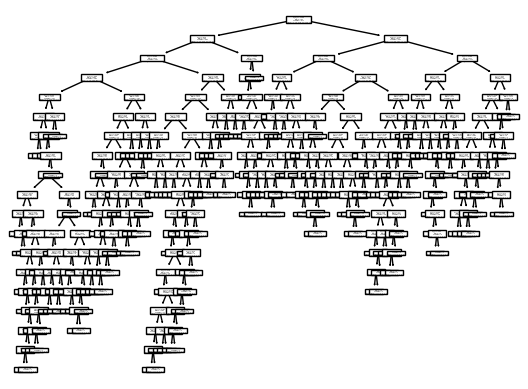

In [35]:
plot_tree(arbol)

In [36]:
prediccion = arbol.predict(X_test)

In [37]:
prediccion

array([5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 7, 5, 6, 6, 5, 7, 5, 6, 5, 4, 5, 5,
       7, 6, 5, 7, 6, 5, 5, 6, 6, 6, 6, 7, 6, 6, 6, 5, 5, 6, 7, 6, 5, 5,
       6, 6, 5, 6, 5, 5, 5, 8, 7, 5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 5, 6, 5,
       6, 5, 5, 5, 5, 6, 6, 7, 7, 7, 6, 6, 6, 5, 5, 5, 5, 6, 7, 5, 5, 6,
       5, 6, 5, 5, 5, 5, 5, 5, 7, 4, 6, 7, 5, 7, 5, 6, 6, 5, 7, 6, 5, 6,
       6, 6, 6, 5, 6, 6, 6, 7, 6, 6, 6, 6, 6, 5, 5, 6, 5, 6, 5, 5, 6, 6,
       5, 5, 6, 6, 7, 5, 5, 6, 6, 5, 5, 6, 6, 5, 5, 6, 8, 6, 5, 6, 5, 7,
       6, 6, 5, 6, 7, 7, 5, 5, 5, 6, 5, 4, 6, 6, 6, 5, 6, 5, 5, 6, 5, 5,
       5, 6, 6, 5, 6, 6, 7, 6, 5, 6, 6, 7, 5, 5, 5, 5, 6, 6, 5, 6, 6, 6,
       6, 7, 5, 5, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 6, 8, 7, 5, 6,
       6, 7, 6, 5, 6, 7, 5, 5, 7, 5, 6, 5, 7, 6, 5, 6, 5, 7, 7, 5, 7, 7,
       6, 7, 7, 7, 6, 5, 7, 5, 5, 6, 6, 5, 5, 6, 7, 5, 5, 6, 4, 5, 5, 5,
       7, 6, 5, 5, 5, 7, 5, 7, 5, 5, 7, 7, 6, 7, 5, 5, 6, 5, 5, 6, 7, 6,
       5, 7, 5, 5], dtype=int64)

In [38]:
#6. Evaluar el desempeño del modelo en el conjunto de Test
#Examinamos la matriz de confusion
pd.crosstab(np.array([y[0]for y in Y_test.values.tolist()]), prediccion, rownames = ['Actual'], colnames=['Predicciones']) 

Predicciones,4,5,6,7,8
Actual,,,,,
3,0,0,2,0,0
4,0,4,1,2,0
5,2,78,24,6,0
6,2,42,70,12,1
7,0,6,9,25,2
8,0,0,2,0,0


In [39]:
accuracy = accuracy_score(Y_test, prediccion)
accuracy

0.596551724137931

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.111963,0.609032,0.080519,0.035887,-0.197676,-0.228090,0.655780,-0.629453,0.134699,0.012289
volatile acidity,-0.111963,1.000000,-0.402117,0.045275,0.121321,0.044773,0.254088,0.166310,0.019465,-0.187245,-0.298041
citric acid,0.609032,-0.402117,1.000000,0.108806,0.167786,-0.132793,-0.151254,0.305998,-0.394225,0.243477,0.227090
residual sugar,0.080519,0.045275,0.108806,1.000000,0.025898,0.201950,0.208750,0.346068,-0.054411,-0.008471,0.051264
chlorides,0.035887,0.121321,0.167786,0.025898,1.000000,-0.004131,0.028278,0.156983,-0.235359,0.369273,-0.218998
free sulfur dioxide,-0.197676,0.044773,-0.132793,0.201950,-0.004131,1.000000,0.683393,-0.020923,0.116098,0.021345,-0.126233
total sulfur dioxide,-0.228090,0.254088,-0.151254,0.208750,0.028278,0.683393,1.000000,0.032860,0.009976,-0.009568,-0.260056
density,0.655780,0.166310,0.305998,0.346068,0.156983,-0.020923,0.032860,1.000000,-0.276774,0.103804,-0.443428
pH,-0.629453,0.019465,-0.394225,-0.054411,-0.235359,0.116098,0.009976,-0.276774,1.000000,-0.184146,0.137722
sulphates,0.134699,-0.187245,0.243477,-0.008471,0.369273,0.021345,-0.009568,0.103804,-0.184146,1.000000,0.098572


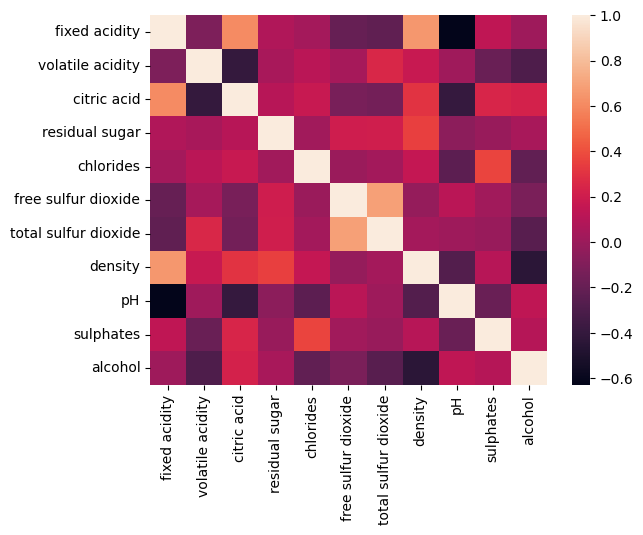

In [40]:
#7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
sns.heatmap(correlacion)
correlacion

#8. Interpretar, analizar y documentar los resultados obtenidos

Podemos interpretar de los resultados obtenidos que según la predicción se van a obtener calidades en vinos entre 4 y 8 puntos.

Podemos interpretar que la predicción se obtiene con una precisión de 0.596 ósea un 60% aproximadament.
